### Project:
What we can learn from visitors visiting Taiwan from 2011 to 2018

The original dataset is available from https://www.kaggle.com/datasets/ceshine/visitors-to-taiwan-by-purpose

### Introduction:
The data was scraped from Taiwan Tourism Bureau. It contains the monthly number of visitors to Taiwan by their residence and purpose.

### Background:
Taiwan's travel and tourism industry plays a significant role in its economy, contributing to economic growth, job creation, and cultural exchange. The foreign exchange earnings from tourism for the year 2019 were estimated to be 14.41 billion US dollars, which was 4.43% of taiwan's GDP. The total number of visitors to Taiwan in 2019 also reached an all-time-high record, 11.84 million. However, after the outbreak of COVID-19, the total number of tourists was down 98.82% to less than 0.14 million. As a result, the foreign exchange earnings from tourism also dropped drastically, from 14 to 1.8 billion US dollars. 

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Add the dataset from a csv file
taiwan =  pd.read_csv("./purpose.csv")
print(taiwan.shape)
print(taiwan.head())

(3615, 13)
     Residence  Region Sub-Region   Period  Business  Pleasure  \
0     Unstated     NaN        NaN  2011-01         1         2   
1       France  Europe        NaN  2011-01      1003       337   
2      Germany  Europe        NaN  2011-01      1835       511   
3        Italy  Europe        NaN  2011-01       517       144   
4  Netherlands  Europe        NaN  2011-01       531       278   

   Visit Relatives  Conference  Study  Exhibition  Medical Treatment  Others  \
0                2           0      0           0                  0      14   
1              474          22     99           0                  0     123   
2              627          46     62           0                  0     129   
3              137          26     10           0                  0      56   
4              211          11     15           0                  0      61   

   Unstated  
0      2474  
1        55  
2       151  
3        43  
4        32  


In [3]:
# Call the info method on ub_data to see a summary of the data
taiwan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3615 entries, 0 to 3614
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Residence          3615 non-null   object
 1   Region             3522 non-null   object
 2   Sub-Region         639 non-null    object
 3   Period             3615 non-null   object
 4   Business           3615 non-null   int64 
 5   Pleasure           3615 non-null   int64 
 6   Visit Relatives    3615 non-null   int64 
 7   Conference         3615 non-null   int64 
 8   Study              3615 non-null   int64 
 9   Exhibition         3615 non-null   int64 
 10  Medical Treatment  3615 non-null   int64 
 11  Others             3615 non-null   int64 
 12  Unstated           3615 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 367.3+ KB


In [4]:
# What are the countries and how many of them in the 'Residence' column
print(taiwan['Residence'].unique())
print(len(taiwan['Residence'].unique()))

['Unstated' 'France' 'Germany' 'Italy' 'Netherlands' 'Switzerland' 'Spain'
 'United Kingdom' 'Belgium' 'Austria' 'Sweden' 'Russian Federation'
 'Others, Europe' 'Australia' 'New Zealand' 'Others, Oceania' 'S. Africa'
 'Greece' 'Others, America' 'Others, Africa' 'Brazil' 'Argentina'
 'HongKong. Macao' 'Mainland China' 'Japan' 'Korea,Republic of'
 'Middle East' 'Malaysia' 'Singapore' 'India' 'Philippines' 'Thailand'
 'Others, Southeast Asia' 'Others, Asia' 'Canada'
 'United States of America' 'Mexico' 'Indonesia' 'Vietnam']
39


In [5]:
# Look into the missing values in the 'Region' column
taiwan[taiwan['Region'].isna()]['Residence'].value_counts()

Unstated    93
Name: Residence, dtype: int64

In [6]:
# Convert the 'Period' column to DateTime
from datetime import datetime
taiwan['Period'] = pd.to_datetime(taiwan['Period'], format='%Y-%m')

In [7]:
# Add a column of 'Total' visitors
taiwan['Total'] = taiwan.loc[:, 'Business':'Unstated'].sum(axis=1)
taiwan.tail(10)

,Residence,Region,Sub-Region,Period,Business,Pleasure,Visit Relatives,Conference,Study,Exhibition,Medical Treatment,Others,Unstated,Total
3605,Greece,Europe,NaN,2018-09-01,52,15,2,6,1,0,0,52,0,128
3606,Austria,Europe,NaN,2018-09-01,228,282,43,13,34,5,0,122,0,727
3607,United Kingdom,Europe,NaN,2018-09-01,1234,2000,318,159,47,30,7,1235,0,5030
3608,Spain,Europe,NaN,2018-09-01,247,343,78,34,89,3,1,303,0,1098
3609,Switzerland,Europe,NaN,2018-09-01,300,372,52,18,20,7,0,151,0,920
3610,Netherlands,Europe,NaN,2018-09-01,794,692,68,38,92,10,2,288,0,1984
3611,Italy,Europe,NaN,2018-09-01,645,303,59,46,89,22,0,331,0,1495
3612,Germany,Europe,NaN,2018-09-01,1867,2190,255,86,358,30,1,855,0,5642
3613,Belgium,Europe,NaN,2018-09-01,219,220,43,23,76,7,2,109,0,699
3614,Mainland China,Asia,NaN,2018-09-01,1302,154404,4180,44,6745,11,1999,49440,0,218125


#### 1. Is there any trend in the total number of visitors from 2011 to 2018?

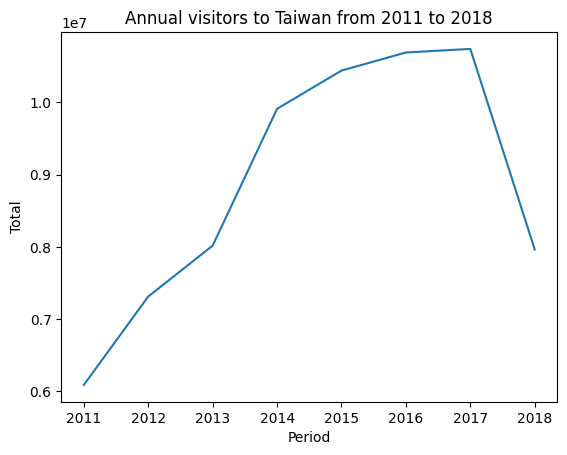

In [8]:
# Make a pivot table grouped by year and sum 'Total' of each country
total_by_year = taiwan.pivot_table(values = 'Total', index = taiwan.Period.dt.year, aggfunc='sum')

# Plot the data 
_ = sns.lineplot(x=total_by_year.index, y =total_by_year.Total)
plt.title('Annual visitors to Taiwan from 2011 to 2018')
plt.show()

In [23]:
total_by_year

,Total
Period,
2011,6087484
2012,7311470
2013,8016280
2014,9910204
2015,10439785
2016,10690279
2017,10739601
2018,7962800


#### 2. Is there any seasonal fluctuation in the total number of visitors from 2011 to 2018?

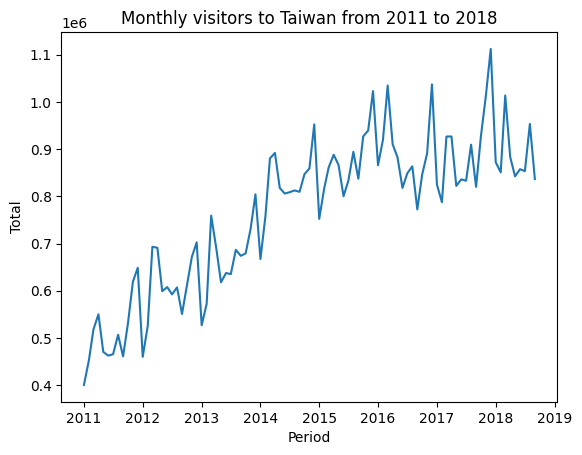

In [9]:
# Make a pivot table grouped by month and sum 'Total' of each country
total_by_month = taiwan.pivot_table(values = 'Total', index = taiwan.Period, aggfunc='sum')

# Make a line plot 
_ = sns.lineplot(x=total_by_month.index, y =total_by_month.Total)
plt.title('Monthly visitors to Taiwan from 2011 to 2018')
plt.show()

#### 3. What were the top 20 countries of residence that visitors to Taiwan came from in the most recent three years (2016-2018)?

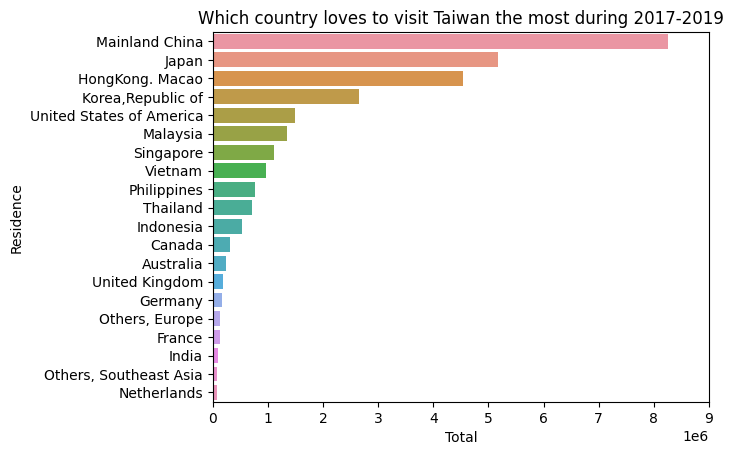

In [10]:
# Select only data from 2016 to 2018
# Make a pivot table grouped by 'Residence', sum 'Total' of each country, and sort from top to bottom
total_by_residence_last3 = taiwan[taiwan.Period.dt.year.isin([2016, 2017, 2018])].pivot_table(values = 'Total', index = taiwan.Residence, aggfunc='sum').sort_values("Total", ascending=False)

# Make a horizontal bar plot
_ = sns.barplot(x=total_by_residence_last3.Total[:20], y =total_by_residence_last3.index[:20])
plt.title('Which country loves to visit Taiwan the most during 2017-2019')
plt.xlim(0, 9000000)
plt.show()

#### 4. What were the top 20 countries of residence that visitors to Taiwan came from during 2011-2013?

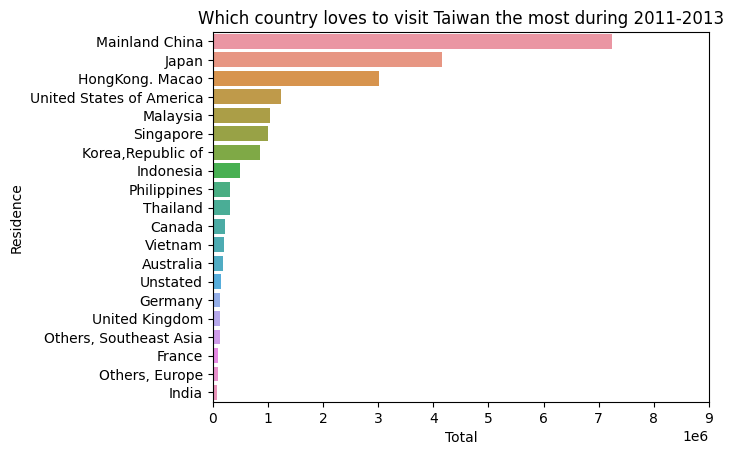

In [11]:
# Select only data from 2011 to 2013
# Make a pivot table grouped by 'Residence', sum 'Total' of each country, and sort from top to bottom
total_by_residence_first3 = taiwan[taiwan.Period.dt.year.isin([2011, 2012, 2013])].pivot_table(values = 'Total', index = taiwan.Residence, aggfunc='sum').sort_values("Total", ascending=False)

# Make a horizontal bar plot
_ = sns.barplot(x=total_by_residence_first3.Total[:20], y =total_by_residence_first3.index[:20])
plt.title('Which country loves to visit Taiwan the most during 2011-2013')
plt.xlim(0, 9000000)
plt.show()

#### 5. What was the main travel purpose for visistors to Taiwan during 2012-2018?

In [12]:
# Make a pivot table grouped by year and sum the visitor number of all purposes for each year
purpose_by_year = taiwan.pivot_table(values = taiwan.columns[4:14], index = taiwan.Period.dt.year, aggfunc='sum', sort=False)
purpose_by_year


,Business,Pleasure,Visit Relatives,Conference,Study,Exhibition,Medical Treatment,Others,Unstated,Total
Period,,,,,,,,,,
2011,984845,3633856,500131,81780,62829,0,0,573304,250739,6087484
2012,893767,4677330,444213,62988,62719,15789,58444,1096220,0,7311470
2013,927262,5479099,469877,61608,75938,16316,100083,886097,0,8016280
2014,769665,7192095,393656,63135,56562,13316,60951,1360824,0,9910204
2015,758889,7505457,408034,60777,59204,13749,67298,1566377,0,10439785
2016,732968,7560753,428625,64704,67954,14876,38260,1782139,0,10690279
2017,744402,7648509,455429,66519,73135,16274,30764,1704569,0,10739601
2018,541869,5348873,355395,48244,62414,12681,24422,1568902,0,7962800


In [13]:
# Create a new pivot table without 2011 data
purpose_by_year_final = purpose_by_year.drop(2011)
purpose_by_year_final

,Business,Pleasure,Visit Relatives,Conference,Study,Exhibition,Medical Treatment,Others,Unstated,Total
Period,,,,,,,,,,
2012,893767,4677330,444213,62988,62719,15789,58444,1096220,0,7311470
2013,927262,5479099,469877,61608,75938,16316,100083,886097,0,8016280
2014,769665,7192095,393656,63135,56562,13316,60951,1360824,0,9910204
2015,758889,7505457,408034,60777,59204,13749,67298,1566377,0,10439785
2016,732968,7560753,428625,64704,67954,14876,38260,1782139,0,10690279
2017,744402,7648509,455429,66519,73135,16274,30764,1704569,0,10739601
2018,541869,5348873,355395,48244,62414,12681,24422,1568902,0,7962800


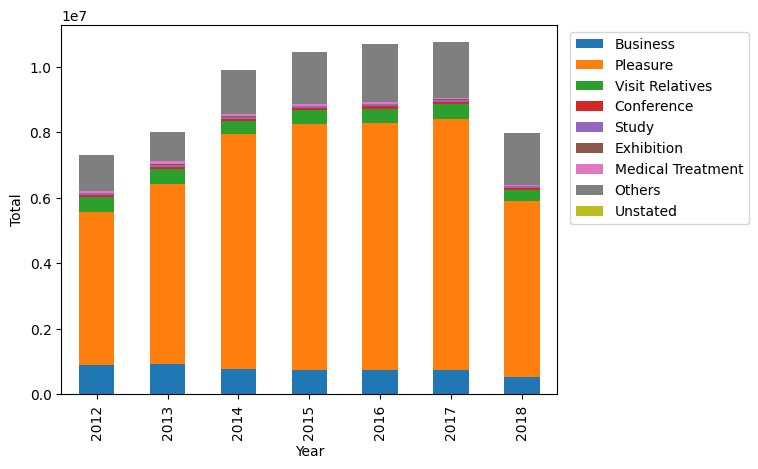

In [22]:
# Make a stacked bar plot with actual visitor numbers
_ = purpose_by_year_final.drop('Total', axis=1).plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Total')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()

#### 6. What was the normalized distribution of travel purpose for visistors to Taiwan during 2012-2018?

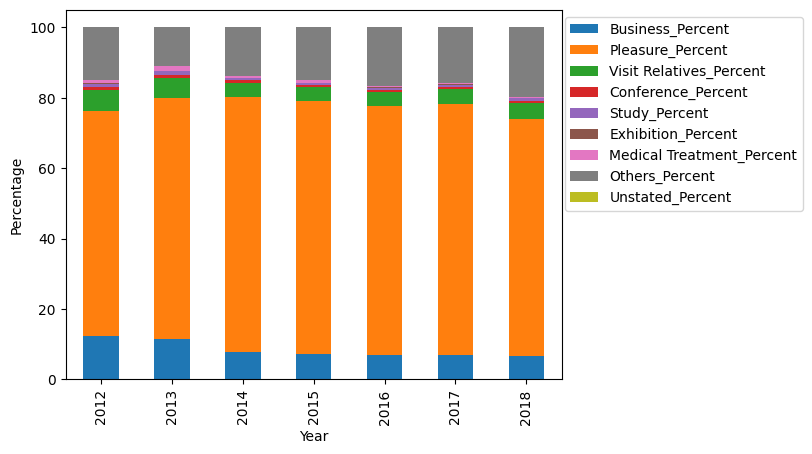

In [15]:
# Create a new pivot table with percentages
purpose_by_year_percent = pd.DataFrame()
for col in taiwan.columns[4:14]:
    purpose_by_year_percent[col + '_Percent'] = (purpose_by_year_final[col] / purpose_by_year_final['Total']) * 100
purpose_by_year_percent

# Make a stacked bar plot with normalized visitor percentages
_ = purpose_by_year_percent.drop('Total_Percent', axis=1).plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()

#### 7. Is there any difference in the distribution of purpose between top 10 countries and the others?

In [17]:
# Select only data from 2012 to 2018
# Make a pivot table grouped by 'Residence' and sum the visitor number of all purposes for each country
purpose_by_residence =  taiwan[taiwan.Period.dt.year.isin(np.arange(2012, 2019))].pivot_table(values = taiwan.columns[4:14], index=taiwan.Residence, aggfunc='sum', sort=False)
purpose_by_residence

,Business,Pleasure,Visit Relatives,Conference,Study,Exhibition,Medical Treatment,Others,Unstated,Total
Residence,,,,,,,,,,
S. Africa,7976,5086,5099,857,331,313,8,13135,0,32805
Canada,61381,326387,118960,5953,3859,973,499,117516,0,635528
"Others, Asia",15379,11353,6132,5260,4538,1664,1273,29497,0,75096
"Others, Southeast Asia",6400,46160,11245,2030,1312,515,6411,39320,0,113393
Vietnam,61413,395113,164936,8338,16593,2037,1177,804653,0,1454260
Thailand,99015,599818,51933,16358,11921,6395,664,347775,0,1133879
Philippines,75410,428274,48744,21336,5459,3185,2823,668184,0,1253415
Indonesia,66410,253162,62543,11722,17326,5426,3700,808981,0,1229270
Singapore,306481,1886414,96736,29741,11766,6046,912,226710,0,2564806


In [18]:
# Add a new column of 'Group' to divide all the countries into two groups
for i in purpose_by_residence.index:
    if i in total_by_residence_last3.index[:10]:
        purpose_by_residence.loc[i, 'Group'] = 'Top10'
    else:
        purpose_by_residence.loc[i, 'Group'] = 'Other'
purpose_by_residence

,Business,Pleasure,Visit Relatives,Conference,Study,Exhibition,Medical Treatment,Others,Unstated,Total,Group
Residence,,,,,,,,,,,
S. Africa,7976,5086,5099,857,331,313,8,13135,0,32805,Other
Canada,61381,326387,118960,5953,3859,973,499,117516,0,635528,Other
"Others, Asia",15379,11353,6132,5260,4538,1664,1273,29497,0,75096,Other
"Others, Southeast Asia",6400,46160,11245,2030,1312,515,6411,39320,0,113393,Other
Vietnam,61413,395113,164936,8338,16593,2037,1177,804653,0,1454260,Top10
Thailand,99015,599818,51933,16358,11921,6395,664,347775,0,1133879,Top10
Philippines,75410,428274,48744,21336,5459,3185,2823,668184,0,1253415,Top10
Indonesia,66410,253162,62543,11722,17326,5426,3700,808981,0,1229270,Other
Singapore,306481,1886414,96736,29741,11766,6046,912,226710,0,2564806,Top10


In [19]:
# Make a pivot table grouped by 'Group' and sum the visitor number of all purposes for each group
purpose_by_residence_2 = purpose_by_residence.pivot_table(values = taiwan.columns[4:14], index = purpose_by_residence.Group, aggfunc='sum', sort=False)
purpose_by_residence_2

,Business,Pleasure,Visit Relatives,Conference,Study,Exhibition,Medical Treatment,Others,Unstated,Total
Group,,,,,,,,,,
Other,989629,1597046,501305,109306,102854,37429,16111,1832249,0,5185929
Top10,4379193,43815070,2453924,318669,355072,65572,364111,8132879,0,59884490


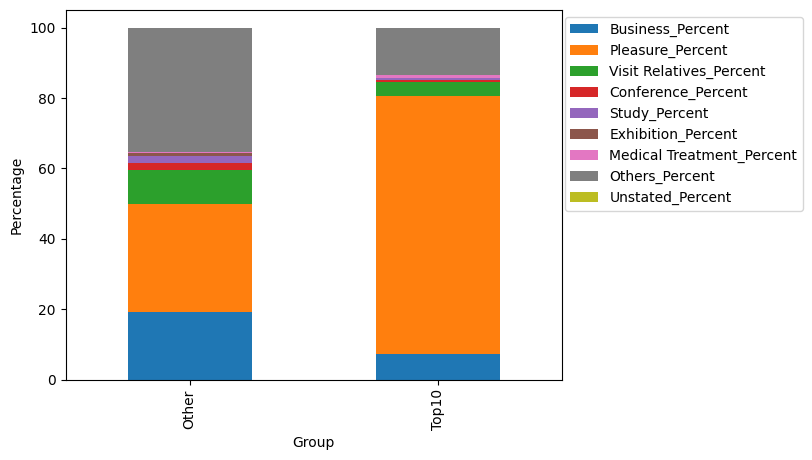

In [20]:
# Create a new pivot table with percentages
purpose_by_residence_percent = pd.DataFrame()
for col in taiwan.columns[4:14]:
    purpose_by_residence_percent[col + '_Percent'] = (purpose_by_residence_2[col] / purpose_by_residence_2['Total']) * 100
purpose_by_residence_percent

# Make a stacked bar plot with normalized visitor percentages
_ = purpose_by_residence_percent.drop('Total_Percent', axis=1).plot(kind='bar', stacked=True)
plt.xlabel('Group')
plt.ylabel('Percentage')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()